In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split , GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score , confusion_matrix , accuracy_score , classification_report
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier


In [41]:
df = pd.read_csv('K:\DEPI\Final Project\Data\Cleaned Final.csv')
df

,State,Sex,GeneralHealth,PhysicalHealthDays,MentalHealthDays,LastCheckupTime,PhysicalActivities,SleepHours,RemovedTeeth,HadHeartAttack,HadAngina,HadStroke,HadAsthma,HadSkinCancer,HadCOPD,HadDepressiveDisorder,HadKidneyDisease,HadArthritis,HadDiabetes,DeafOrHardOfHearing,BlindOrVisionDifficulty,DifficultyConcentrating,DifficultyWalking,DifficultyDressingBathing,DifficultyErrands,SmokerStatus,ECigaretteUsage,ChestScan,RaceEthnicityCategory,AgeCategory,HeightInMeters,WeightInKilograms,BMI,AlcoholDrinkers,HIVTesting,FluVaxLast12,PneumoVaxEver,TetanusLast10Tdap,HighRiskLastYear
0,Alabama,Female,Very good,0.0,0.0,Within past year (anytime less than 12 months ...,0,8.0,0.0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,Never smoked,Not at all (right now),0,"White only, Non-Hispanic",Elderly (70+),1.702775,83.182065,28.566,0,0,1,0,1.0,No
1,Alabama,Female,Excellent,0.0,0.0,Within past year (anytime less than 12 months ...,0,6.0,0.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,Never smoked,Never used e-cigarettes in my entire life,0,"White only, Non-Hispanic",Elderly (70+),1.600000,68.040000,26.570,0,0,0,0,0.0,No
2,Alabama,Female,Very good,2.0,3.0,Within past year (anytime less than 12 months ...,1,5.0,0.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,Never smoked,Never used e-cigarettes in my entire life,0,"White only, Non-Hispanic",Seniors (55-69),1.570000,63.500000,25.610,0,0,0,0,1.0,No
3,Alabama,Female,Excellent,0.0,0.0,Within past year (anytime less than 12 months ...,1,7.0,0.0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,Current smoker - now smokes some days,Never used e-cigarettes in my entire life,1,"White only, Non-Hispanic",Seniors (55-69),1.650000,63.500000,23.300,0,0,1,1,0.0,No
4,Alabama,Female,Fair,2.0,0.0,Within past year (anytime less than 12 months ...,1,9.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Never smoked,Never used e-cigarettes in my entire life,1,"White only, Non-Hispanic",Early Middle Age (35-44),1.570000,53.980000,21.770,1,0,0,1,0.0,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
394493,Virgin Islands,Female,Good,0.0,3.0,Within past 2 years (1 year but less than 2 ye...,1,6.0,0.0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,Never smoked,Never used e-cigarettes in my entire life,1,"Black only, Non-Hispanic",Young Adults (18-34),1.650000,69.850000,25.630,1,1,0,0,0.0,No
394494,Virgin Islands,Female,Excellent,2.0,2.0,Within past year (anytime less than 12 months ...,1,7.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Never smoked,Never used e-cigarettes in my entire life,0,"Black only, Non-Hispanic",Late Middle Age (45-54),1.700000,83.010000,28.660,0,1,1,0,1.0,No
394495,Virgin Islands,Female,Poor,30.0,30.0,5 or more years ago,0,5.0,1.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Current smoker - now smokes every day,Use them some days,0,"White only, Non-Hispanic",Seniors (55-69),1.700000,49.900000,17.230,1,0,0,0,0.0,No
394496,Virgin Islands,Male,Very good,0.0,0.0,Within past year (anytime less than 12 months ...,0,5.0,0.0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,Never smoked,Never used e-cigarettes in my entire life,1,"Black only, Non-Hispanic",Elderly (70+),1.830000,108.860000,32.550,0,1,1,1,0.0,No


In [42]:
pd.set_option('display.max_columns' , None)

## Encoding

In [43]:
from sklearn.preprocessing import OrdinalEncoder

oe = OrdinalEncoder(categories=[['Poor','Fair','Good' , 'Very good' , 'Excellent' ]])
df['GeneralHealth'] = oe.fit_transform(df[['GeneralHealth']])

In [44]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['Sex'] = le.fit_transform(df['Sex'])

In [45]:
df['Sex'].value_counts()

Sex
0    208932
1    185566
Name: count, dtype: int64

In [46]:
le = LabelEncoder()
cols = ['State', 'RaceEthnicityCategory' , 'LastCheckupTime' , 'HighRiskLastYear']   # الأعمدة الكاتيجوريكال

for c in cols:
    df[c] = le.fit_transform(df[c])

In [48]:
from sklearn.preprocessing import OrdinalEncoder

oe = OrdinalEncoder(categories=[['Young Adults (18-34)' , 'Early Middle Age (35-44)' , 'Late Middle Age (45-54)' , 'Seniors (55-69)','Elderly (70+)']])
df['AgeCategory'] = oe.fit_transform(df[['AgeCategory']])

In [ ]:
df = pd.get_dummies(df, columns=['SmokerStatus', 'ECigaretteUsage'], drop_first=True)


In [102]:
df.columns

Index(['State', 'Sex', 'GeneralHealth', 'PhysicalHealthDays',
       'MentalHealthDays', 'LastCheckupTime', 'PhysicalActivities',
       'SleepHours', 'RemovedTeeth', 'HadHeartAttack', 'HadAngina',
       'HadStroke', 'HadAsthma', 'HadSkinCancer', 'HadCOPD',
       'HadDepressiveDisorder', 'HadKidneyDisease', 'HadArthritis',
       'HadDiabetes', 'DeafOrHardOfHearing', 'BlindOrVisionDifficulty',
       'DifficultyConcentrating', 'DifficultyWalking',
       'DifficultyDressingBathing', 'DifficultyErrands', 'ChestScan',
       'RaceEthnicityCategory', 'HeightInMeters', 'WeightInKilograms', 'BMI',
       'AlcoholDrinkers', 'HIVTesting', 'FluVaxLast12', 'PneumoVaxEver',
       'TetanusLast10Tdap', 'HighRiskLastYear',
       'SmokerStatus_Current smoker - now smokes some days',
       'SmokerStatus_Former smoker', 'SmokerStatus_Never smoked',
       'ECigaretteUsage_Not at all (right now)',
       'ECigaretteUsage_Use them every day',
       'ECigaretteUsage_Use them some days', 'AgeCategor

## Feature Dropping & Splitting

In [54]:
drop_list = ['State' ,'LastCheckupTime' , 'RemovedTeeth' , 'HadAngina' , 'HadStroke' , 'HadAsthma' , 'HadSkinCancer' , 'HadCOPD' , 'HadKidneyDisease', 'HadArthritis' , 'ChestScan' , 'BMI' , 
             'HIVTesting' , 'FluVaxLast12' , 'PneumoVaxEver' , 'TetanusLast10Tdap'  , 'HadDepressiveDisorder'   ]



In [ ]:
df.drop(columns=drop_list)


,Sex,GeneralHealth,PhysicalHealthDays,MentalHealthDays,PhysicalActivities,SleepHours,HadHeartAttack,HadDiabetes,DeafOrHardOfHearing,BlindOrVisionDifficulty,DifficultyConcentrating,DifficultyWalking,DifficultyDressingBathing,DifficultyErrands,SmokerStatus,ECigaretteUsage,RaceEthnicityCategory,AgeCategory,HeightInMeters,WeightInKilograms,AlcoholDrinkers,HighRiskLastYear
0,0,3.0,0.0,0.0,0,8.0,0,1,0,0,0,0,0,0,Never smoked,Not at all (right now),"White only, Non-Hispanic",Elderly (70+),1.702775,83.182065,0,No
1,0,4.0,0.0,0.0,0,6.0,0,0,0,0,0,0,0,0,Never smoked,Never used e-cigarettes in my entire life,"White only, Non-Hispanic",Elderly (70+),1.600000,68.040000,0,No
2,0,3.0,2.0,3.0,1,5.0,0,0,0,0,0,0,0,0,Never smoked,Never used e-cigarettes in my entire life,"White only, Non-Hispanic",Seniors (55-69),1.570000,63.500000,0,No
3,0,4.0,0.0,0.0,1,7.0,0,0,0,0,0,0,0,0,Current smoker - now smokes some days,Never used e-cigarettes in my entire life,"White only, Non-Hispanic",Seniors (55-69),1.650000,63.500000,0,No
4,0,1.0,2.0,0.0,1,9.0,0,0,0,0,0,0,0,0,Never smoked,Never used e-cigarettes in my entire life,"White only, Non-Hispanic",Early Middle Age (35-44),1.570000,53.980000,1,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
394493,0,2.0,0.0,3.0,1,6.0,0,0,0,0,0,0,0,0,Never smoked,Never used e-cigarettes in my entire life,"Black only, Non-Hispanic",Young Adults (18-34),1.650000,69.850000,1,No
394494,0,4.0,2.0,2.0,1,7.0,0,0,0,0,0,0,0,0,Never smoked,Never used e-cigarettes in my entire life,"Black only, Non-Hispanic",Late Middle Age (45-54),1.700000,83.010000,0,No
394495,0,0.0,30.0,30.0,0,5.0,0,0,0,0,0,0,0,0,Current smoker - now smokes every day,Use them some days,"White only, Non-Hispanic",Seniors (55-69),1.700000,49.900000,1,No
394496,1,3.0,0.0,0.0,0,5.0,1,0,0,0,0,0,0,0,Never smoked,Never used e-cigarettes in my entire life,"Black only, Non-Hispanic",Elderly (70+),1.830000,108.860000,0,No


In [24]:
Y = df['HadDepressiveDisorder']
Y

0         0
1         0
2         0
3         0
4         0
         ..
394493    1
394494    0
394495    0
394496    0
394497    0
Name: HadDepressiveDisorder, Length: 394498, dtype: int64

## Modeling & HyperParams Tuning

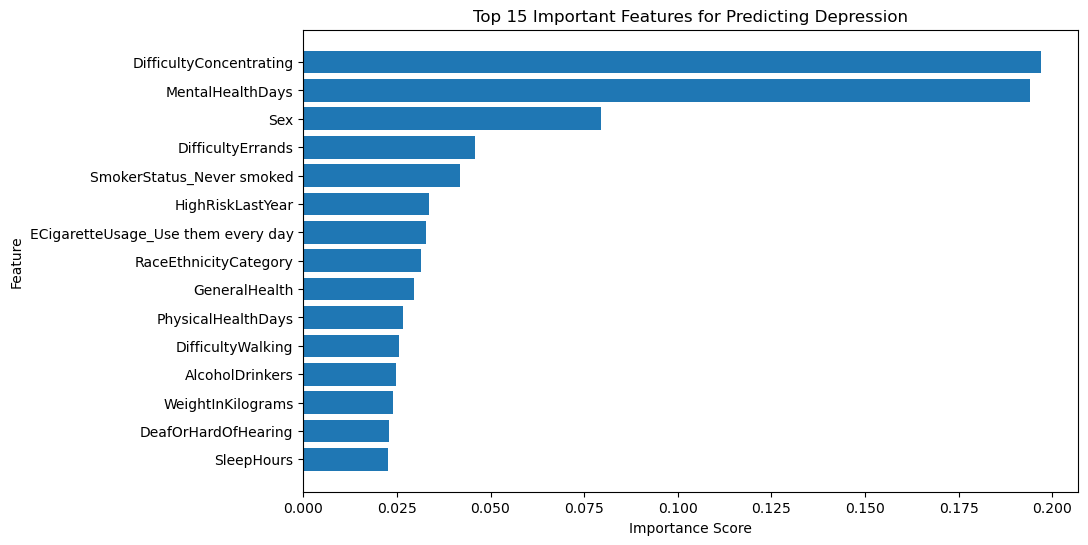

In [51]:
X_train, X_, y_train, y_ = train_test_split(X, Y, test_size=0.4, random_state=40)
X_cv, X_test, y_cv, y_test = train_test_split(X_, y_, test_size=0.5, random_state=40)
model = XGBClassifier(random_state=40 , n_estimators=800 , max_depth=7  , n_jobs=-1 , scale_pos_weight=3.75 , reg_lambda = 5 ,  colsample_bytree=0.8)

model.fit(X_train, y_train)

importances = model.feature_importances_
feature_importance = pd.DataFrame({'Feature': X.columns, 'Importance': importances}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10,6))
plt.barh(feature_importance['Feature'][:15], feature_importance['Importance'][:15])
plt.gca().invert_yaxis()
plt.title('Top 15 Important Features for Predicting Depression')
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.show()


In [49]:
y_train_pred = model.predict(X_train)

In [ ]:

proba = model.predict_proba(X_train)[:,1]
for t in [ 0.1 , 0.3 , 0.5 , 0.6 , 0.8 ]:
    y_th = (proba >= t).astype(int)
    print(t, classification_report(y_train, y_train_pred))


0.1               precision    recall  f1-score   support

           0       0.95      0.86      0.90    186926
           1       0.61      0.82      0.70     49772

    accuracy                           0.85    236698
   macro avg       0.78      0.84      0.80    236698
weighted avg       0.88      0.85      0.86    236698

0.3               precision    recall  f1-score   support

           0       0.95      0.86      0.90    186926
           1       0.61      0.82      0.70     49772

    accuracy                           0.85    236698
   macro avg       0.78      0.84      0.80    236698
weighted avg       0.88      0.85      0.86    236698

0.5               precision    recall  f1-score   support

           0       0.95      0.86      0.90    186926
           1       0.61      0.82      0.70     49772

    accuracy                           0.85    236698
   macro avg       0.78      0.84      0.80    236698
weighted avg       0.88      0.85      0.86    236698

0.6    

In [43]:
y_cv_pred = model.predict(X_cv)

In [ ]:

proba = model.predict_proba(X_cv)[:,1]
for t in [ 0.1 , 0.3 , 0.5 , 0.6 , 0.8 ]:
    y_th = (proba >= t).astype(int)
    print(t, classification_report(y_cv, y_cv_pred))

0.1               precision    recall  f1-score   support

           0       0.87      0.85      0.86     62345
           1       0.49      0.53      0.51     16555

    accuracy                           0.79     78900
   macro avg       0.68      0.69      0.69     78900
weighted avg       0.79      0.79      0.79     78900

0.3               precision    recall  f1-score   support

           0       0.87      0.85      0.86     62345
           1       0.49      0.53      0.51     16555

    accuracy                           0.79     78900
   macro avg       0.68      0.69      0.69     78900
weighted avg       0.79      0.79      0.79     78900

0.5               precision    recall  f1-score   support

           0       0.87      0.85      0.86     62345
           1       0.49      0.53      0.51     16555

    accuracy                           0.79     78900
   macro avg       0.68      0.69      0.69     78900
weighted avg       0.79      0.79      0.79     78900

0.6    

In [256]:
print(classification_report(y_train, y_train_pred))

              precision    recall  f1-score   support

           0       0.96      0.97      0.96    249272
           1       0.87      0.84      0.85     66326

    accuracy                           0.94    315598
   macro avg       0.91      0.90      0.91    315598
weighted avg       0.94      0.94      0.94    315598



In [257]:
proba = model.predict_proba(X_test)[:,1]
y_pred = (proba >= new_thresh).astype(int)

In [258]:
print(classification_report(y_pred=y_pred , y_true=y_test))

              precision    recall  f1-score   support

           0       0.87      0.89      0.88     62332
           1       0.54      0.50      0.52     16568

    accuracy                           0.80     78900
   macro avg       0.70      0.69      0.70     78900
weighted avg       0.80      0.80      0.80     78900



## Imbalancing Data problem & Data Leakage Probability 

In [46]:
df['MentalHealthDays'].value_counts().sort_index().reset_index()

,MentalHealthDays,count
0,0.0,241368
1,1.0,12980
2,2.0,21370
3,3.0,13795
4,4.0,7173
5,5.0,17885
6,6.0,2096
7,7.0,7132
8,8.0,1554
9,9.0,277


In [47]:
df[df['MentalHealthDays'] < 10].HadDepressiveDisorder.value_counts()

HadDepressiveDisorder
0    280981
1     44649
Name: count, dtype: int64

## Pipe line & SMOTE 

In [ ]:
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import RandomizedSearchCV
import lightgbm as lgb
from sklearn.metrics import make_scorer, f1_score

pipe = Pipeline([
    ('smote', SMOTE(random_state=42)),
    ('clf', XGBClassifier(random_state=41 ,  n_jobs=-1 , scale_pos_weight=3.75 , reg_lambda = 1 , class_weight='balanced' ))
])

param_dist = {
    'clf__n_estimators': [200,500,1000],
    'clf__learning_rate': [0.01, 0.05, 0.1],
    'clf__num_leaves': [31, 63, 127],
    'clf__min_child_samples': [20, 50, 100],
    'clf__subsample': [0.6, 0.8, 1.0],
    'clf__colsample_bytree': [0.6,0.8,1.0]
}

scorer = make_scorer(f1_score, pos_label=1)
rs = RandomizedSearchCV(pipe, param_dist, n_iter=30, scoring=scorer, cv=5, verbose=2, n_jobs=-1, random_state=42)
rs.fit(X_train, y_train)
print("best:", rs.best_params_, rs.best_score_)

# Evaluate
best = rs.best_estimator_



In [68]:
y_pred_train = best.predict(X_train)
print(classification_report(y_train, y_pred_train))

              precision    recall  f1-score   support

           0       0.93      0.75      0.83    186926
           1       0.45      0.78      0.57     49772

    accuracy                           0.76    236698
   macro avg       0.69      0.76      0.70    236698
weighted avg       0.83      0.76      0.78    236698



In [261]:
proba = best.predict_proba(X_train)[:,1]
y_train_pred = (proba >= new_thresh).astype(int)

In [262]:
print(classification_report(y_train, y_train_pred))

              precision    recall  f1-score   support

           0       0.87      0.91      0.89    249272
           1       0.58      0.48      0.52     66326

    accuracy                           0.82    315598
   macro avg       0.72      0.69      0.71    315598
weighted avg       0.81      0.82      0.81    315598



## Removing MentalHealthDays Feature

In [15]:
X.drop(columns='MentalHealthDays' , inplace=True)

In [ ]:
X_train, X_, y_train, y_ = train_test_split(X, Y, test_size=0.4, random_state=41)
X_cv, X_test, y_cv, y_test = train_test_split(X_, y_, test_size=0.5, random_state=41)


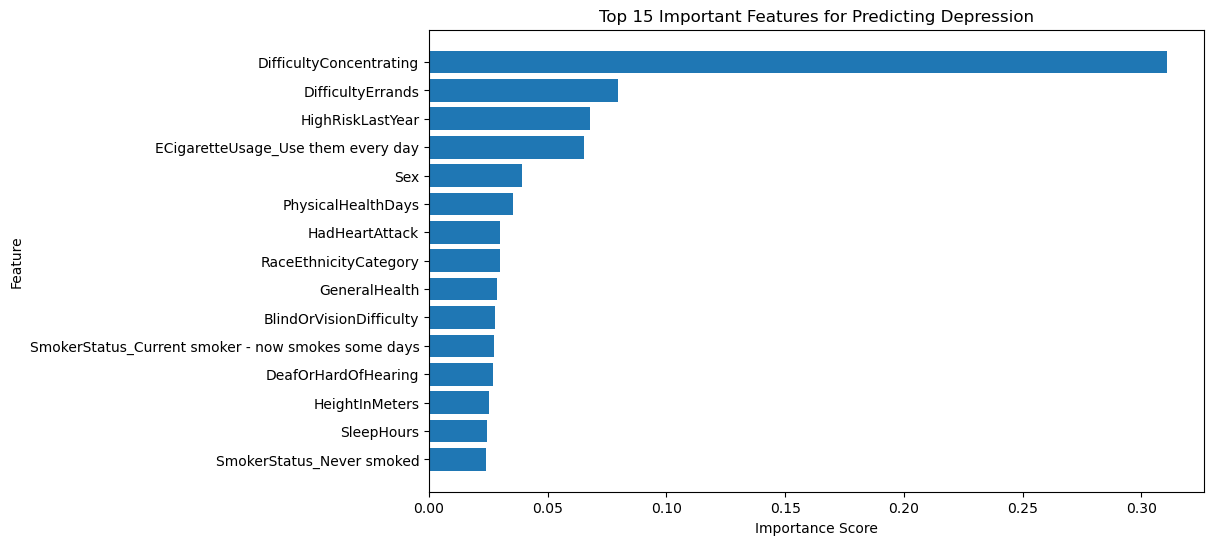

In [31]:
model = XGBClassifier(random_state=41 , n_estimators=900 , max_depth=11  , n_jobs=-1 , scale_pos_weight=3.75 , reg_lambda = 1.4 ,  colsample_bytree=0.8)

model.fit(X_train, y_train)

importances = model.feature_importances_
feature_importance = pd.DataFrame({'Feature': X.columns, 'Importance': importances}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10,6))
plt.barh(feature_importance['Feature'][:15], feature_importance['Importance'][:15])
plt.gca().invert_yaxis()
plt.title('Top 15 Important Features for Predicting Depression')
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.show()


In [ ]:
y_train_pred = model.predict(X_train)

In [ ]:
print(classification_report(y_true=y_train , y_pred=y_train_pred))

              precision    recall  f1-score   support

           0       0.98      0.96      0.97    186847
           1       0.87      0.91      0.89     49851

    accuracy                           0.95    236698
   macro avg       0.92      0.94      0.93    236698
weighted avg       0.95      0.95      0.95    236698



In [34]:
y_cv_pred = model.predict(X_cv)

In [35]:
print(classification_report(y_true=y_cv , y_pred=y_cv_pred))

              precision    recall  f1-score   support

           0       0.84      0.84      0.84     62317
           1       0.41      0.42      0.42     16583

    accuracy                           0.75     78900
   macro avg       0.63      0.63      0.63     78900
weighted avg       0.75      0.75      0.75     78900



## Bagging Algorithm

In [ ]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

In [54]:
X_train, X_, y_train, y_ = train_test_split(X, Y, test_size=0.4, random_state=41)
X_cv, X_test, y_cv, y_test = train_test_split(X_, y_, test_size=0.5, random_state=41)
model = BaggingClassifier(random_state=41 , n_estimators=900 , n_jobs=-1 ,bootstrap=True )
model.fit(X_train , y_train)


BaggingClassifier(n_estimators=900, n_jobs=-1, random_state=41)

In [55]:
y_train_pred = model.predict(X_train)
print(classification_report(y_true=y_train , y_pred=y_train_pred))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99    186847
           1       1.00      0.96      0.98     49851

    accuracy                           0.99    236698
   macro avg       0.99      0.98      0.99    236698
weighted avg       0.99      0.99      0.99    236698



In [56]:
y_cv_pred = model.predict(X_cv)
print(classification_report(y_true=y_cv , y_pred=y_cv_pred))

              precision    recall  f1-score   support

           0       0.86      0.93      0.89     62317
           1       0.60      0.41      0.49     16583

    accuracy                           0.82     78900
   macro avg       0.73      0.67      0.69     78900
weighted avg       0.80      0.82      0.81     78900



In [59]:
proba = model.predict_proba(X_cv)[:,1]
for t in [ 0.1, 0.5 ,0.9 ]:
    y_th = (proba >= t).astype(int)
    print(t, classification_report(y_cv, y_cv_pred))

0.1               precision    recall  f1-score   support

           0       0.86      0.93      0.89     62317
           1       0.60      0.41      0.49     16583

    accuracy                           0.82     78900
   macro avg       0.73      0.67      0.69     78900
weighted avg       0.80      0.82      0.81     78900

0.5               precision    recall  f1-score   support

           0       0.86      0.93      0.89     62317
           1       0.60      0.41      0.49     16583

    accuracy                           0.82     78900
   macro avg       0.73      0.67      0.69     78900
weighted avg       0.80      0.82      0.81     78900

0.9               precision    recall  f1-score   support

           0       0.86      0.93      0.89     62317
           1       0.60      0.41      0.49     16583

    accuracy                           0.82     78900
   macro avg       0.73      0.67      0.69     78900
weighted avg       0.80      0.82      0.81     78900



## Less Features

In [ ]:
X.columns
['Sex', 'GeneralHealth', 'PhysicalHealthDays',
       'PhysicalActivities', 'SleepHours',  'HadDiabetes',
       'DeafOrHardOfHearing', 'BlindOrVisionDifficulty',
       'DifficultyConcentrating', 'DifficultyWalking',
       'DifficultyDressingBathing', 'DifficultyErrands',
       'RaceEthnicityCategory', 'HeightInMeters', 'WeightInKilograms',
       'AlcoholDrinkers', 'HighRiskLastYear',
       'SmokerStatus_Current smoker - now smokes some days',
       , 'SmokerStatus_Never smoked',
       ]


Index(['Sex', 'GeneralHealth', 'PhysicalHealthDays', 'MentalHealthDays',
       'PhysicalActivities', 'SleepHours', 'HadHeartAttack', 'HadDiabetes',
       'DeafOrHardOfHearing', 'BlindOrVisionDifficulty',
       'DifficultyConcentrating', 'DifficultyWalking',
       'DifficultyDressingBathing', 'DifficultyErrands',
       'RaceEthnicityCategory', 'HeightInMeters', 'WeightInKilograms',
       'AlcoholDrinkers', 'HighRiskLastYear',
       'SmokerStatus_Current smoker - now smokes some days',
       'SmokerStatus_Former smoker', 'SmokerStatus_Never smoked',
       'ECigaretteUsage_Use them every day'],
      dtype='object')

In [ ]:
X.drop(columns=[ 'HadHeartAttack' , 'SmokerStatus_Former smoker' , 'ECigaretteUsage_Use them every day' , 'SmokerStatus_Never smoked' , 'HighRiskLastYear'] , inplace=True) 


In [87]:
X.drop(columns=['SmokerStatus_Never smoked' , 'HighRiskLastYear'] , inplace=True) 


In [99]:
X.drop(columns=['HeightInMeters' , 'WeightInKilograms' , 'HadDiabetes' , 'PhysicalHealthDays']  , inplace=True) 


In [88]:
X.columns


Index(['Sex', 'GeneralHealth', 'PhysicalHealthDays', 'MentalHealthDays',
       'PhysicalActivities', 'SleepHours', 'HadDiabetes',
       'DeafOrHardOfHearing', 'BlindOrVisionDifficulty',
       'DifficultyConcentrating', 'DifficultyWalking',
       'DifficultyDressingBathing', 'DifficultyErrands',
       'RaceEthnicityCategory', 'HeightInMeters', 'WeightInKilograms',
       'AlcoholDrinkers',
       'SmokerStatus_Current smoker - now smokes some days'],
      dtype='object')

Text(0, 0.5, 'Feature')

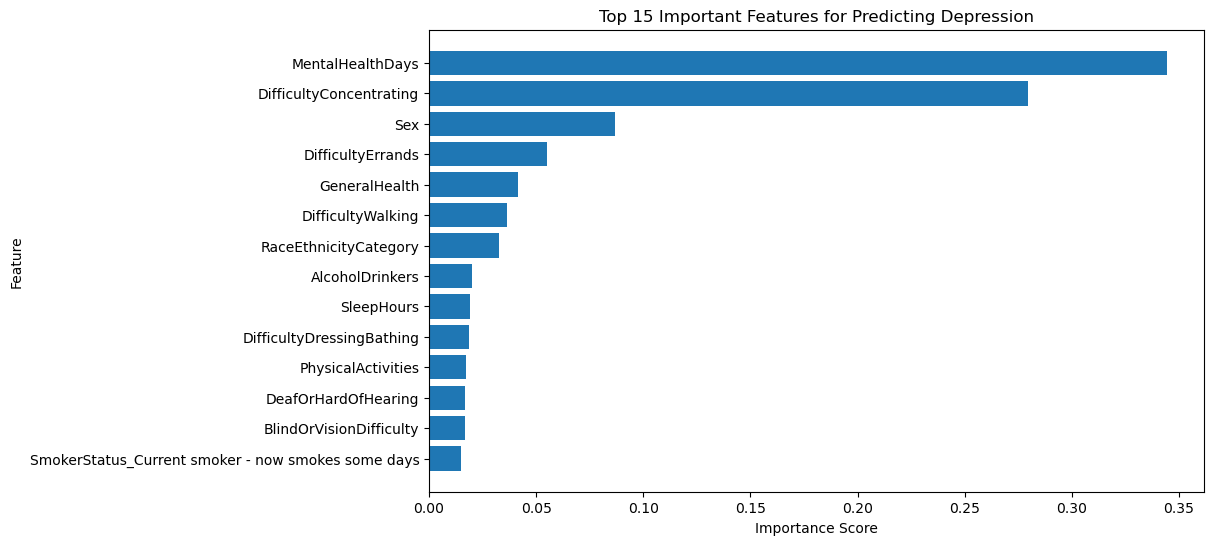

In [119]:
X_train, X_, y_train, y_ = train_test_split(X, Y, test_size=0.4, random_state=40)
X_cv, X_test, y_cv, y_test = train_test_split(X_, y_, test_size=0.5, random_state=40)
model = XGBClassifier(random_state=40 , n_estimators=800  , n_jobs=-1 , scale_pos_weight=3.75 , reg_lambda = 1 , reg_alpha = 2 ,   colsample_bytree=0.8)

model.fit(X_train, y_train)

importances = model.feature_importances_
feature_importance = pd.DataFrame({'Feature': X.columns, 'Importance': importances}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10,6))
plt.barh(feature_importance['Feature'][:15], feature_importance['Importance'][:15])
plt.gca().invert_yaxis()
plt.title('Top 15 Important Features for Predicting Depression')
plt.xlabel('Importance Score')
plt.ylabel('Feature')

In [104]:
X.shape

(394498, 14)

In [120]:
y_train_pred = model.predict(X_train)



In [ ]:
y_train_pred = model.predict(X_train)
proba = model.predict_proba(X_train)[:,1]
for t in [ 0.1 , 0.3 , 0.5 , 0.6 , 0.8 ]:
    y_th = (proba >= t).astype(int)
    print(t, classification_report(y_train, y_train_pred))

0.1               precision    recall  f1-score   support

           0       0.92      0.80      0.85    186926
           1       0.49      0.74      0.59     49772

    accuracy                           0.78    236698
   macro avg       0.71      0.77      0.72    236698
weighted avg       0.83      0.78      0.80    236698

0.3               precision    recall  f1-score   support

           0       0.92      0.80      0.85    186926
           1       0.49      0.74      0.59     49772

    accuracy                           0.78    236698
   macro avg       0.71      0.77      0.72    236698
weighted avg       0.83      0.78      0.80    236698

0.5               precision    recall  f1-score   support

           0       0.92      0.80      0.85    186926
           1       0.49      0.74      0.59     49772

    accuracy                           0.78    236698
   macro avg       0.71      0.77      0.72    236698
weighted avg       0.83      0.78      0.80    236698

0.6    

In [95]:
y_cv_pred = model.predict(X_cv)

In [96]:

proba = model.predict_proba(X_cv)[:,1]
for t in [ 0.1 , 0.3 , 0.5 , 0.6 , 0.8 ]:
    y_th = (proba >= t).astype(int)
    print(t, classification_report(y_cv, y_cv_pred))

0.1               precision    recall  f1-score   support

           0       0.87      0.85      0.86     62345
           1       0.48      0.51      0.49     16555

    accuracy                           0.78     78900
   macro avg       0.67      0.68      0.68     78900
weighted avg       0.79      0.78      0.78     78900

0.3               precision    recall  f1-score   support

           0       0.87      0.85      0.86     62345
           1       0.48      0.51      0.49     16555

    accuracy                           0.78     78900
   macro avg       0.67      0.68      0.68     78900
weighted avg       0.79      0.78      0.78     78900

0.5               precision    recall  f1-score   support

           0       0.87      0.85      0.86     62345
           1       0.48      0.51      0.49     16555

    accuracy                           0.78     78900
   macro avg       0.67      0.68      0.68     78900
weighted avg       0.79      0.78      0.78     78900

0.6    

In [123]:
df['HighRiskLastYear'].value_counts()

HighRiskLastYear
0    377313
1     17185
Name: count, dtype: int64

In [127]:
from sklearn.model_selection import cross_val_score

def forward_selection(X, y, estimator=None, cv=3, scoring='roc_auc', max_features=None):
    if estimator is None:
        estimator = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
    n_features = X.shape[1]
    if max_features is None:
        max_features = n_features
    remaining = set(range(n_features))
    selected = []
    best_scores = []
    while remaining and len(selected) < max_features:
        best_feat, best_score = None, -np.inf
        for f in remaining:
            cand = selected + [f]
            s = cross_val_score(estimator, X[:, cand], y, cv=cv, scoring=scoring).mean()
            if s > best_score:
                best_score = s
                best_feat = f
        selected.append(best_feat)
        remaining.remove(best_feat)
        best_scores.append(best_score)
        print(f"added {best_feat} -> cv {scoring}: {best_score:.4f}")
    return selected, best_scores

In [128]:
selected_order, scores = forward_selection(X.values if hasattr(X,'values') else X, Y, cv=4, max_features=13)
print('order selected:', selected_order)

c:\Users\karim\anaconda3\Lib\site-packages\xgboost\training.py:199: UserWarning: [19:12:43] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\karim\anaconda3\Lib\site-packages\xgboost\training.py:199: UserWarning: [19:12:43] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\karim\anaconda3\Lib\site-packages\xgboost\training.py:199: UserWarning: [19:12:43] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\karim\anaconda3\Lib\site-packages\xgboost\training.py:199: UserWarning: [19:12:44] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtr

added 2 -> cv roc_auc: 0.7650


c:\Users\karim\anaconda3\Lib\site-packages\xgboost\training.py:199: UserWarning: [19:12:55] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\karim\anaconda3\Lib\site-packages\xgboost\training.py:199: UserWarning: [19:12:55] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\karim\anaconda3\Lib\site-packages\xgboost\training.py:199: UserWarning: [19:12:55] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\karim\anaconda3\Lib\site-packages\xgboost\training.py:199: UserWarning: [19:12:55] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtr

added 7 -> cv roc_auc: 0.7860


c:\Users\karim\anaconda3\Lib\site-packages\xgboost\training.py:199: UserWarning: [19:13:16] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\karim\anaconda3\Lib\site-packages\xgboost\training.py:199: UserWarning: [19:13:17] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\karim\anaconda3\Lib\site-packages\xgboost\training.py:199: UserWarning: [19:13:17] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\karim\anaconda3\Lib\site-packages\xgboost\training.py:199: UserWarning: [19:13:18] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtr

added 0 -> cv roc_auc: 0.8012


c:\Users\karim\anaconda3\Lib\site-packages\xgboost\training.py:199: UserWarning: [19:13:43] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\karim\anaconda3\Lib\site-packages\xgboost\training.py:199: UserWarning: [19:13:44] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\karim\anaconda3\Lib\site-packages\xgboost\training.py:199: UserWarning: [19:13:44] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\karim\anaconda3\Lib\site-packages\xgboost\training.py:199: UserWarning: [19:13:45] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtr

added 1 -> cv roc_auc: 0.8084


c:\Users\karim\anaconda3\Lib\site-packages\xgboost\training.py:199: UserWarning: [19:14:16] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\karim\anaconda3\Lib\site-packages\xgboost\training.py:199: UserWarning: [19:14:17] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\karim\anaconda3\Lib\site-packages\xgboost\training.py:199: UserWarning: [19:14:18] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\karim\anaconda3\Lib\site-packages\xgboost\training.py:199: UserWarning: [19:14:19] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtr

added 11 -> cv roc_auc: 0.8123


c:\Users\karim\anaconda3\Lib\site-packages\xgboost\training.py:199: UserWarning: [19:14:47] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\karim\anaconda3\Lib\site-packages\xgboost\training.py:199: UserWarning: [19:14:48] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\karim\anaconda3\Lib\site-packages\xgboost\training.py:199: UserWarning: [19:14:48] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\karim\anaconda3\Lib\site-packages\xgboost\training.py:199: UserWarning: [19:14:49] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtr

added 4 -> cv roc_auc: 0.8139


c:\Users\karim\anaconda3\Lib\site-packages\xgboost\training.py:199: UserWarning: [19:15:06] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\karim\anaconda3\Lib\site-packages\xgboost\training.py:199: UserWarning: [19:15:07] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\karim\anaconda3\Lib\site-packages\xgboost\training.py:199: UserWarning: [19:15:07] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\karim\anaconda3\Lib\site-packages\xgboost\training.py:199: UserWarning: [19:15:08] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtr

added 10 -> cv roc_auc: 0.8149


c:\Users\karim\anaconda3\Lib\site-packages\xgboost\training.py:199: UserWarning: [19:15:23] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\karim\anaconda3\Lib\site-packages\xgboost\training.py:199: UserWarning: [19:15:24] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\karim\anaconda3\Lib\site-packages\xgboost\training.py:199: UserWarning: [19:15:24] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\karim\anaconda3\Lib\site-packages\xgboost\training.py:199: UserWarning: [19:15:25] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtr

added 8 -> cv roc_auc: 0.8155


c:\Users\karim\anaconda3\Lib\site-packages\xgboost\training.py:199: UserWarning: [19:15:38] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\karim\anaconda3\Lib\site-packages\xgboost\training.py:199: UserWarning: [19:15:39] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\karim\anaconda3\Lib\site-packages\xgboost\training.py:199: UserWarning: [19:15:39] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\karim\anaconda3\Lib\site-packages\xgboost\training.py:199: UserWarning: [19:15:40] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtr

added 12 -> cv roc_auc: 0.8158


c:\Users\karim\anaconda3\Lib\site-packages\xgboost\training.py:199: UserWarning: [19:15:52] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\karim\anaconda3\Lib\site-packages\xgboost\training.py:199: UserWarning: [19:15:53] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\karim\anaconda3\Lib\site-packages\xgboost\training.py:199: UserWarning: [19:15:53] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\karim\anaconda3\Lib\site-packages\xgboost\training.py:199: UserWarning: [19:15:54] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtr

added 6 -> cv roc_auc: 0.8161


c:\Users\karim\anaconda3\Lib\site-packages\xgboost\training.py:199: UserWarning: [19:16:04] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\karim\anaconda3\Lib\site-packages\xgboost\training.py:199: UserWarning: [19:16:05] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\karim\anaconda3\Lib\site-packages\xgboost\training.py:199: UserWarning: [19:16:05] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\karim\anaconda3\Lib\site-packages\xgboost\training.py:199: UserWarning: [19:16:06] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtr

added 3 -> cv roc_auc: 0.8161


c:\Users\karim\anaconda3\Lib\site-packages\xgboost\training.py:199: UserWarning: [19:16:14] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\karim\anaconda3\Lib\site-packages\xgboost\training.py:199: UserWarning: [19:16:15] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\karim\anaconda3\Lib\site-packages\xgboost\training.py:199: UserWarning: [19:16:16] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\karim\anaconda3\Lib\site-packages\xgboost\training.py:199: UserWarning: [19:16:16] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtr

added 9 -> cv roc_auc: 0.8163


c:\Users\karim\anaconda3\Lib\site-packages\xgboost\training.py:199: UserWarning: [19:16:22] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\karim\anaconda3\Lib\site-packages\xgboost\training.py:199: UserWarning: [19:16:23] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\karim\anaconda3\Lib\site-packages\xgboost\training.py:199: UserWarning: [19:16:24] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\karim\anaconda3\Lib\site-packages\xgboost\training.py:199: UserWarning: [19:16:24] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtr

added 13 -> cv roc_auc: 0.8161
order selected: [2, 7, 0, 1, 11, 4, 10, 8, 12, 6, 3, 9, 13]


In [129]:
order = [2, 7, 0, 1, 11, 4, 10, 8, 12, 6, 3, 9, 13]

selected_feature_names = X.columns[order].tolist()
for name in selected_feature_names:
    print(name)

MentalHealthDays
DifficultyConcentrating
Sex
GeneralHealth
RaceEthnicityCategory
SleepHours
DifficultyErrands
DifficultyWalking
AlcoholDrinkers
BlindOrVisionDifficulty
PhysicalActivities
DifficultyDressingBathing
SmokerStatus_Current smoker - now smokes some days


# CatBoost

In [135]:
!pip install catboost

   ---------------------------------------- 0.0/102.4 MB ? eta -:--:--
   ---------------------------------------- 0.0/102.4 MB ? eta -:--:--
   ---------------------------------------- 0.8/102.4 MB 2.9 MB/s eta 0:00:35
    --------------------------------------- 1.3/102.4 MB 3.0 MB/s eta 0:00:34
    --------------------------------------- 1.8/102.4 MB 3.2 MB/s eta 0:00:32
   - -------------------------------------- 2.6/102.4 MB 3.0 MB/s eta 0:00:34
   - -------------------------------------- 3.4/102.4 MB 3.2 MB/s eta 0:00:32
   - -------------------------------------- 4.2/102.4 MB 3.3 MB/s eta 0:00:31
   - -------------------------------------- 5.0/102.4 MB 3.3 MB/s eta 0:00:30
   -- ------------------------------------- 5.8/102.4 MB 3.4 MB/s eta 0:00:29
   -- ------------------------------------- 6.6/102.4 MB 3.4 MB/s eta 0:00:28
   -- ------------------------------------- 7.1/102.4 MB 3.4 MB/s eta 0:00:28
   --- ------------------------------------ 7.9/102.4 MB 3.5 MB/s eta 0:00:28


In [1]:
from catboost import CatBoostClassifier, Pool


In [26]:
X_train, X_, y_train, y_ = train_test_split(X, Y, test_size=0.4, random_state=40)
X_cv, X_test, y_cv, y_test = train_test_split(X_, y_, test_size=0.5, random_state=40)

In [35]:
from catboost import CatBoostClassifier, Pool

cat_cols = [i for i, col in enumerate(X.columns) if X[col].dtype == 'object']

train_pool = Pool(X_train, y_train, cat_features=cat_cols)
cv_pool  = Pool(X_cv,  y_cv,  cat_features=cat_cols)

model = CatBoostClassifier(
    iterations=1000,
    learning_rate=0.05,
    depth=6,
    loss_function='Logloss',
    eval_metric='F1',
    verbose=100 , 
    scale_pos_weight=3.75 
)

model.fit(train_pool, eval_set=cv_pool)

0:	learn: 0.7321413	test: 0.7286038	best: 0.7286038 (0)	total: 227ms	remaining: 3m 46s
100:	learn: 0.7465160	test: 0.7447693	best: 0.7451630 (97)	total: 18.4s	remaining: 2m 43s
200:	learn: 0.7489549	test: 0.7456491	best: 0.7457917 (194)	total: 35.8s	remaining: 2m 22s
300:	learn: 0.7509278	test: 0.7457275	best: 0.7460541 (259)	total: 59.5s	remaining: 2m 18s
400:	learn: 0.7528853	test: 0.7462174	best: 0.7464904 (382)	total: 1m 36s	remaining: 2m 23s
500:	learn: 0.7536158	test: 0.7463715	best: 0.7465009 (476)	total: 2m 12s	remaining: 2m 11s
600:	learn: 0.7549058	test: 0.7464888	best: 0.7466016 (514)	total: 2m 49s	remaining: 1m 52s
700:	learn: 0.7555340	test: 0.7470001	best: 0.7471424 (696)	total: 3m 16s	remaining: 1m 23s
800:	learn: 0.7561778	test: 0.7469640	best: 0.7471424 (696)	total: 3m 34s	remaining: 53.4s
900:	learn: 0.7568687	test: 0.7470544	best: 0.7473066 (888)	total: 3m 53s	remaining: 25.7s
999:	learn: 0.7575868	test: 0.7472556	best: 0.7474998 (988)	total: 4m 11s	remaining: 0us

b

In [36]:
y_train_pred = model.predict(X_train)

In [37]:
proba = model.predict_proba(X_train)[:,1]
for t in [ 0.1 , 0.3 , 0.5 , 0.6 , 0.8 ]:
    y_th = (proba >= t).astype(int)
    print(t, classification_report(y_train, y_train_pred))

0.1               precision    recall  f1-score   support

           0       0.92      0.78      0.84    186926
           1       0.47      0.74      0.58     49772

    accuracy                           0.77    236698
   macro avg       0.69      0.76      0.71    236698
weighted avg       0.82      0.77      0.79    236698

0.3               precision    recall  f1-score   support

           0       0.92      0.78      0.84    186926
           1       0.47      0.74      0.58     49772

    accuracy                           0.77    236698
   macro avg       0.69      0.76      0.71    236698
weighted avg       0.82      0.77      0.79    236698

0.5               precision    recall  f1-score   support

           0       0.92      0.78      0.84    186926
           1       0.47      0.74      0.58     49772

    accuracy                           0.77    236698
   macro avg       0.69      0.76      0.71    236698
weighted avg       0.82      0.77      0.79    236698

0.6    

## Under Sampling

In [49]:

df_majority = df[df['HadDepressiveDisorder'] == 0]
df_minority = df[df['HadDepressiveDisorder'] == 1]

# النسبة المطلوبة
ratio = 1
n_majority_needed = len(df_minority) * ratio

# عينة من majority بالنسبة الجديدة
df_majority_sampled = df_majority.sample(n_majority_needed, random_state=42)

# دمج
df_balanced = pd.concat([df_majority_sampled, df_minority])

# Shuffle
df_balanced = df_balanced.sample(frac=1, random_state=42).reset_index(drop=True)

In [50]:
df_balanced.shape


(165788, 43)

In [51]:
df_balanced

,State,Sex,GeneralHealth,PhysicalHealthDays,MentalHealthDays,LastCheckupTime,PhysicalActivities,SleepHours,RemovedTeeth,HadHeartAttack,HadAngina,HadStroke,HadAsthma,HadSkinCancer,HadCOPD,HadDepressiveDisorder,HadKidneyDisease,HadArthritis,HadDiabetes,DeafOrHardOfHearing,BlindOrVisionDifficulty,DifficultyConcentrating,DifficultyWalking,DifficultyDressingBathing,DifficultyErrands,ChestScan,RaceEthnicityCategory,AgeCategory,HeightInMeters,WeightInKilograms,BMI,AlcoholDrinkers,HIVTesting,FluVaxLast12,PneumoVaxEver,TetanusLast10Tdap,HighRiskLastYear,SmokerStatus_Current smoker - now smokes some days,SmokerStatus_Former smoker,SmokerStatus_Never smoked,ECigaretteUsage_Not at all (right now),ECigaretteUsage_Use them every day,ECigaretteUsage_Use them some days
0,5,0,4.0,0.0,4.0,3,1,9.0,1.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,4,3.0,1.68,74.84,26.63,0,0,1,1,1.0,0,False,True,False,False,False,False
1,6,0,3.0,0.0,3.0,2,1,6.0,0.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,4,1.0,1.65,58.97,21.63,1,1,1,1,1.0,0,False,False,True,True,False,False
2,30,1,1.0,5.0,0.0,3,1,12.0,1.0,0,0,0,0,0,1,1,0,0,0,0,1,1,1,0,0,1,4,4.0,1.78,77.11,24.39,1,0,1,0,1.0,0,False,False,False,False,False,False
3,12,1,1.0,7.0,4.0,3,1,8.0,1.0,0,0,1,0,0,0,1,0,1,0,1,1,0,1,0,0,1,3,4.0,1.70,62.14,21.46,1,0,1,0,1.0,0,False,True,False,False,True,False
4,38,1,3.0,0.0,2.0,3,1,7.0,0.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,4,2.0,1.88,113.40,32.10,1,0,0,0,1.0,0,False,False,True,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
165783,24,1,0.0,29.0,29.0,3,0,10.0,0.0,0,0,0,0,0,0,1,1,1,1,0,0,0,1,0,0,1,4,2.0,1.88,172.37,48.79,0,0,0,0,1.0,0,False,True,False,True,False,False
165784,16,0,2.0,25.0,3.0,3,1,7.0,1.0,0,0,0,1,0,1,1,0,1,0,0,0,0,0,0,0,1,4,4.0,1.47,74.84,34.48,1,0,0,1,1.0,0,False,True,False,False,False,False
165785,33,0,1.0,0.0,8.0,3,1,5.0,1.0,0,0,0,1,0,0,1,0,1,1,0,1,1,1,1,1,1,0,3.0,1.75,97.52,31.75,1,1,0,0,0.0,0,False,False,True,False,False,False
165786,45,0,2.0,4.0,25.0,3,1,4.0,1.0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,1,4,3.0,1.60,61.23,23.91,0,0,0,0,1.0,0,False,False,False,True,False,False


In [52]:
drop_list = ['State' ,'LastCheckupTime' , 'RemovedTeeth' , 'HadAngina' , 'HadStroke' , 'HadAsthma' , 'HadSkinCancer' , 'HadCOPD' , 'HadKidneyDisease', 'HadArthritis' , 'ChestScan' , 'BMI' , 
             'HIVTesting' , 'FluVaxLast12' , 'PneumoVaxEver' , 'TetanusLast10Tdap'  , 'HadDepressiveDisorder' 
              	  , 'ECigaretteUsage_Use them some days' , 'ECigaretteUsage_Use them every day' ,'ECigaretteUsage_Not at all (right now)' 
                   , 'SmokerStatus_Never smoked' , 'SmokerStatus_Former smoker' , 'HadHeartAttack' , 'HighRiskLastYear']
X = df_balanced.drop(columns=drop_list)

In [17]:
df['AgeCategory'].value_counts()

AgeCategory
Seniors (55-69)             121427
Elderly (70+)               101138
Young Adults (18-34)         65964
Late Middle Age (45-54)      54691
Early Middle Age (35-44)     51278
Name: count, dtype: int64

In [ ]:
from sklearn.preprocessing import OrdinalEncoder

oe = OrdinalEncoder(categories=[[ 'Young Adults (18-34)' , 'Early Middle Age (35-44)' , 'Late Middle Age (45-54)' , 'Seniors (55-69)','Elderly (70+)'  ]])
df['AgeCategory'] = oe.fit_transform(df[['AgeCategory']])

In [53]:
y = df_balanced['HadDepressiveDisorder']
y.shape

(165788,)

In [393]:
X.drop(columns=['PhysicalHealthDays' ] , inplace=True)

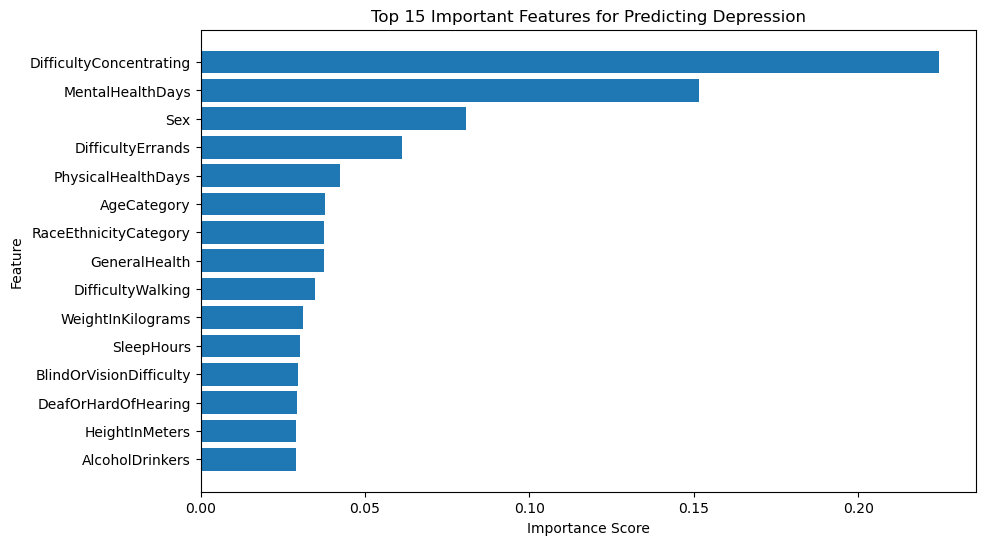

In [144]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=40)
model = XGBClassifier(random_state=40 , n_estimators = 3200 , max_depth= 9 , n_jobs=-1 , colsample_bytree = 0.7 , subsample = 0.8  ,
                       gamma = 0.5 , learning_rate = 0.03 , reg_alpha = 0.5 , reg_lambda = 0.7 ) 

#model = XGBClassifier(random_state=40 , n_estimators = 3200 , max_depth= 9 , n_jobs=-1 , colsample_bytree = 0.7 , subsample = 0.8  ,    gamma = 0.6 , learning_rate = 0.05 , reg_alpha = 0.5 , reg_lambda = 0.7 ) 


model.fit(X_train, y_train)

importances = model.feature_importances_
feature_importance = pd.DataFrame({'Feature': X.columns, 'Importance': importances}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10,6))
plt.barh(feature_importance['Feature'][:15], feature_importance['Importance'][:15])
plt.gca().invert_yaxis()
plt.title('Top 15 Important Features for Predicting Depression')
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.show()

In [145]:
y_train_pred = model.predict(X_train)


In [146]:
print(classification_report(y_train , y_train_pred))

              precision    recall  f1-score   support

           0       0.85      0.91      0.88     58002
           1       0.90      0.84      0.87     58049

    accuracy                           0.87    116051
   macro avg       0.87      0.87      0.87    116051
weighted avg       0.87      0.87      0.87    116051



In [147]:
y_pred = model.predict(X_test)
print(classification_report(y_test , y_pred))


              precision    recall  f1-score   support

           0       0.73      0.76      0.74     24892
           1       0.75      0.72      0.73     24845

    accuracy                           0.74     49737
   macro avg       0.74      0.74      0.74     49737
weighted avg       0.74      0.74      0.74     49737



In [95]:
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier

params = {
    "learning_rate": [0.05, 0.1, 0.2],
    "subsample": [0.7, 0.9],
    "colsample_bytree": [0.6, 0.8, 1.0],
    "gamma": [0, 0.3, 0.5],
    "reg_alpha": [0, 0.5, 1],
    "reg_lambda": [1, 2, 5]
}

xgb = XGBClassifier(
    random_state=40,
    n_jobs=-1,
    eval_metric="logloss"   # عشان ما يحصل تحذيرات
)

grid = GridSearchCV(
    estimator=xgb,
    param_grid=params,
    cv=3,
    scoring="f1",     # أو auc لو binary
    verbose=2
)

grid.fit(X_train, y_train)

print(grid.best_params_)
print(grid.best_score_)

Fitting 3 folds for each of 486 candidates, totalling 1458 fits
[CV] END colsample_bytree=0.6, gamma=0, learning_rate=0.05, reg_alpha=0, reg_lambda=1, subsample=0.7; total time=   0.3s
[CV] END colsample_bytree=0.6, gamma=0, learning_rate=0.05, reg_alpha=0, reg_lambda=1, subsample=0.7; total time=   0.3s
[CV] END colsample_bytree=0.6, gamma=0, learning_rate=0.05, reg_alpha=0, reg_lambda=1, subsample=0.7; total time=   0.2s
[CV] END colsample_bytree=0.6, gamma=0, learning_rate=0.05, reg_alpha=0, reg_lambda=1, subsample=0.9; total time=   0.3s
[CV] END colsample_bytree=0.6, gamma=0, learning_rate=0.05, reg_alpha=0, reg_lambda=1, subsample=0.9; total time=   0.2s
[CV] END colsample_bytree=0.6, gamma=0, learning_rate=0.05, reg_alpha=0, reg_lambda=1, subsample=0.9; total time=   0.2s
[CV] END colsample_bytree=0.6, gamma=0, learning_rate=0.05, reg_alpha=0, reg_lambda=2, subsample=0.7; total time=   0.3s
[CV] END colsample_bytree=0.6, gamma=0, learning_rate=0.05, reg_alpha=0, reg_lambda=2, su

KeyboardInterrupt: 

In [483]:
from sklearn.model_selection import cross_val_score

def forward_selection(X, y, estimator=None, cv=3, scoring='f1', max_features=None):
    if estimator is None:
        estimator = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
    n_features = X.shape[1]
    if max_features is None:
        max_features = n_features
    remaining = set(range(n_features))
    selected = []
    best_scores = []
    while remaining and len(selected) < max_features:
        best_feat, best_score = None, -np.inf
        for f in remaining:
            cand = selected + [f]
            s = cross_val_score(estimator, X[:, cand], y, cv=cv, scoring=scoring).mean()
            if s > best_score:
                best_score = s
                best_feat = f
        selected.append(best_feat)
        remaining.remove(best_feat)
        best_scores.append(best_score)
        print(f"added {best_feat} -> cv {scoring}: {best_score:.4f}")
    return selected, best_scores

In [484]:
selected_order, scores = forward_selection(X.values if hasattr(X,'values') else X, y, cv=4, max_features=12)
print('order selected:', selected_order)


added 3 -> cv f1: 0.7246
added 9 -> cv f1: 0.7317
added 13 -> cv f1: 0.7402
added 7 -> cv f1: 0.7404
added 8 -> cv f1: 0.7402
added 17 -> cv f1: 0.7372
added 11 -> cv f1: 0.7364
added 0 -> cv f1: 0.7367
added 5 -> cv f1: 0.7380
added 10 -> cv f1: 0.7389
added 16 -> cv f1: 0.7382
added 1 -> cv f1: 0.7384
order selected: [3, 9, 13, 7, 8, 17, 11, 0, 5, 10, 16, 1]


In [485]:
order = [3, 9, 13, 7, 8, 17, 11, 0, 5, 10, 16, 1]
selected_feature_names = X.columns[order].tolist()
for name in selected_feature_names:
    print(name)

MentalHealthDays
DifficultyConcentrating
RaceEthnicityCategory
DeafOrHardOfHearing
BlindOrVisionDifficulty
SmokerStatus_Current smoker - now smokes some days
DifficultyDressingBathing
Sex
SleepHours
DifficultyWalking
AlcoholDrinkers
GeneralHealth


In [ ]:
from sklearn.preprocessing import OrdinalEncoder

oe = OrdinalEncoder(categories=[['Young Adults (18-34)' , 'Early Middle Age (35-44)' , 'Late Middle Age (45-54)' , 'Seniors (55-69)','Elderly (70+)']])
df_balanced['AgeCategory'] = oe.fit_transform(df[['AgeCategory']])

In [38]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score, precision_recall_curve, classification_report
from tensorflow import keras
import tensorflow as tf
from tensorflow.keras import layers, models, callbacks

# -----------------------
# Assume df already loaded and encoded
df_balanced1 = df_balanced.copy()

X = df_balanced1.drop(columns=['HadDepressiveDisorder']).values.astype("float32")
y = df_balanced1['HadDepressiveDisorder'].values.astype("float32")

X_train, X_temp, y_train, y_temp = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y)

X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp)

# Scale numeric features (fit on train only)
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

# -----------------------
# Build MLP model
input_dim = X_train.shape[1]
model = models.Sequential([
    layers.Dense(256, activation="relu", input_shape=(input_dim,)),
    layers.BatchNormalization(),
    layers.Dropout(0.3),

    layers.Dense(128, activation="relu"),
    layers.BatchNormalization(),
    layers.Dropout(0.25),

    layers.Dense(64, activation="relu"),
    layers.BatchNormalization(),
    layers.Dropout(0.2),

    layers.Dense(1, activation="linear")
])

model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),
    metrics=["accuracy", tf.keras.metrics.AUC(name="auc")], 
    loss=tf.keras.losses.BinaryCrossentropy(from_logits=True)
)

es = callbacks.EarlyStopping(
    monitor="val_auc", patience=8, restore_best_weights=True, mode="max"
)

history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=100,
    batch_size=1024,
    callbacks=[es],
    verbose=1
)

# -----------------------
# Pick best threshold using Validation set
val_proba = model.predict(X_val).ravel()
prec, rec, thr = precision_recall_curve(y_val, val_proba)
f1s = 2 * prec * rec / (prec + rec + 1e-12)
best_idx = np.argmax(f1s)
best_thr = thr[best_idx]
print("Best Threshold:", best_thr, "Best F1:", f1s[best_idx])

# -----------------------
# Evaluate on Test using best threshold
test_proba = model.predict(X_test).ravel()
test_pred = (test_proba >= best_thr).astype(int)

print(classification_report(y_test, test_pred, digits=4))


Epoch 1/100


c:\Users\karim\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


114/114 ━━━━━━━━━━━━━━━━━━━━ 5s 21ms/step - accuracy: 0.6908 - auc: 0.7246 - loss: 0.5983 - val_accuracy: 0.6977 - val_auc: 0.7603 - val_loss: 0.5447
Epoch 2/100
114/114 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.7199 - auc: 0.7595 - loss: 0.5411 - val_accuracy: 0.7217 - val_auc: 0.7692 - val_loss: 0.5249
Epoch 3/100
114/114 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - accuracy: 0.7281 - auc: 0.7708 - loss: 0.5264 - val_accuracy: 0.7284 - val_auc: 0.7742 - val_loss: 0.5195
Epoch 4/100
114/114 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - accuracy: 0.7336 - auc: 0.7763 - loss: 0.5190 - val_accuracy: 0.7359 - val_auc: 0.7774 - val_loss: 0.5167
Epoch 5/100
114/114 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - accuracy: 0.7373 - auc: 0.7814 - loss: 0.5136 - val_accuracy: 0.7410 - val_auc: 0.7794 - val_loss: 0.5144
Epoch 6/100
114/114 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - accuracy: 0.7391 - auc: 0.7837 - loss: 0.5115 - val_accuracy: 0.7389 - val_auc: 0.7807 - val_loss: 0.5136
Epoch 7/100
114/114 ━━━━━━━━━━━━━━━━━━━━

In [39]:
print(classification_report(y_test, test_pred, digits=4))


              precision    recall  f1-score   support

         0.0     0.7884    0.6775    0.7288     12435
         1.0     0.7173    0.8182    0.7644     12434

    accuracy                         0.7478     24869
   macro avg     0.7528    0.7478    0.7466     24869
weighted avg     0.7528    0.7478    0.7466     24869

